In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
df.drop(columns=['day', 'month', 'year'],inplace=True)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [11]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [12]:
# Independent and Dependent features
X = df.drop('FWI',axis=1)
y = df['FWI']

In [13]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [16]:
y_train.shape,y_test.shape

((182,), (61,))

In [17]:
# Feature Selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

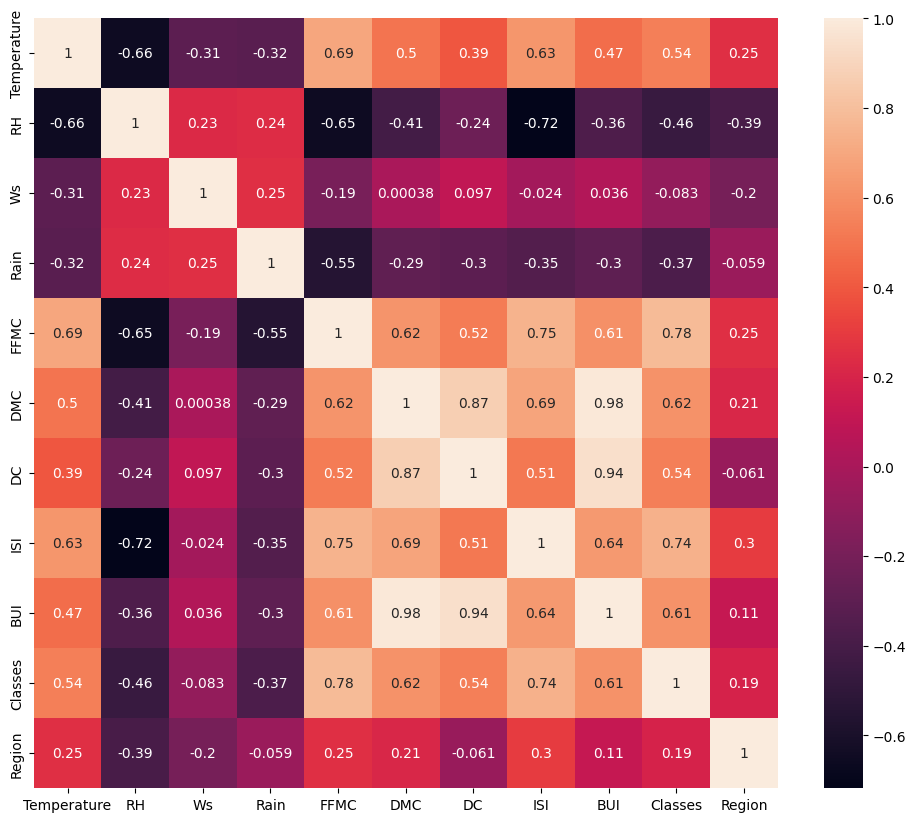

In [18]:
# Check for multicollinearity
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [19]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=X_train.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [20]:
# Threshold value - Set by domain xxpert
corr_features = correlation(df,0.85)

In [21]:
# Drop these features because correlation is greater than 0.85
X_train.drop(columns=corr_features, axis=1, inplace=True)
X_test.drop(columns=corr_features, axis=1, inplace=True)

#Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Box plots to understand the feature scaling


Text(0.5, 1.0, 'X_train after scaling')

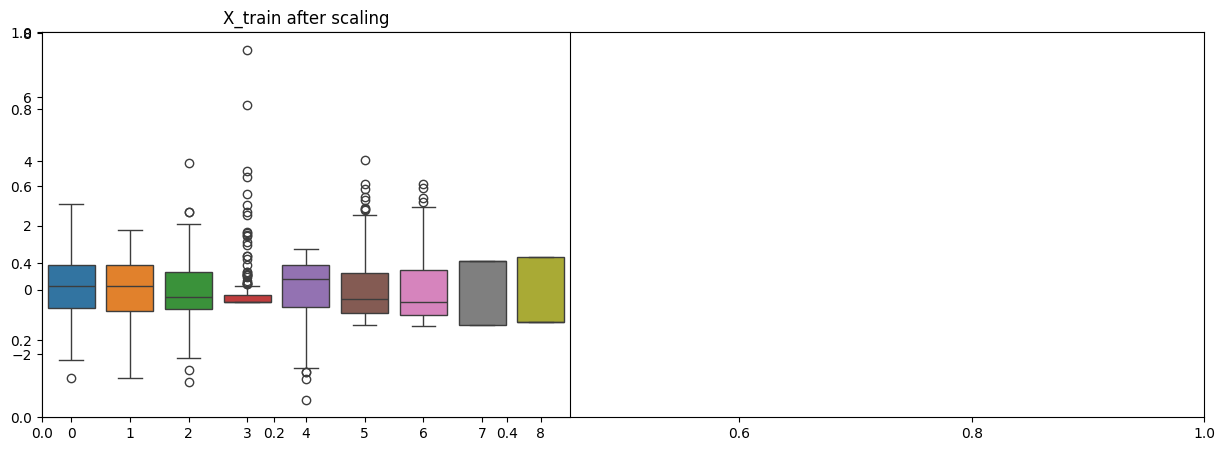

In [23]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train after scaling')

# Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mean Absolute Error: 0.546823646524997
R2 Score: 0.9847657384266951


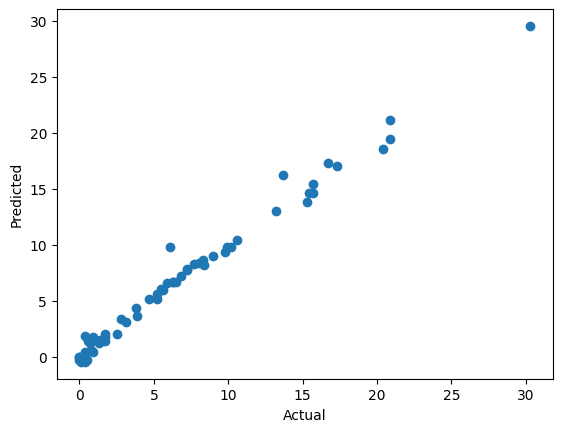

In [25]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)
score = r2_score(y_test,y_pred)
print('R2 Score:',score)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##  Lasso Regression

Mean Absolute Error: 1.133175994914409
R2 Score: 0.9492020263112388


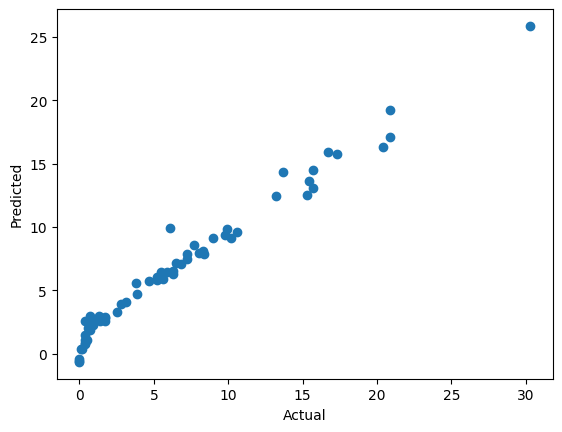

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regressor = Lasso()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)
score = r2_score(y_test,y_pred)
print('R2 Score:',score)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Cross Validation Lasso

In [27]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)
lasso.fit(X_train,y_train)

LassoCV(cv=5)

In [28]:
lasso.alpha_

0.05725391318234408

In [29]:
lasso.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [30]:
(lasso.mse_path_).shape

(100, 5)

Mean Absolute Error: 0.6199701158263431
R2 Score: 0.9820946715928275


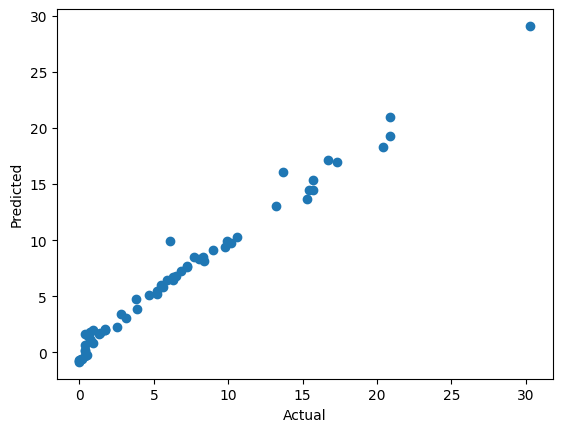

In [31]:
y_pred_2 = lasso.predict(X_test)
mae = mean_absolute_error(y_test,y_pred_2)
print('Mean Absolute Error:',mae)
score = r2_score(y_test,y_pred_2)
print('R2 Score:',score)
plt.scatter(y_test,y_pred_2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Ridge Regression

Mean Absolute Error: 0.5642305340105691
R2 Score: 0.9842993364555513


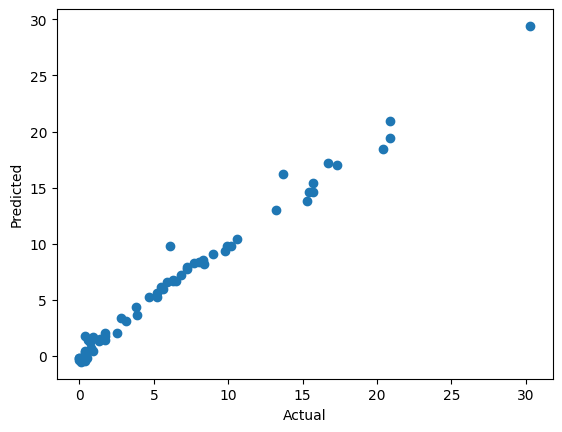

In [32]:
from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)
score = r2_score(y_test,y_pred)
print('R2 Score:',score)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Cross Validation Ridge

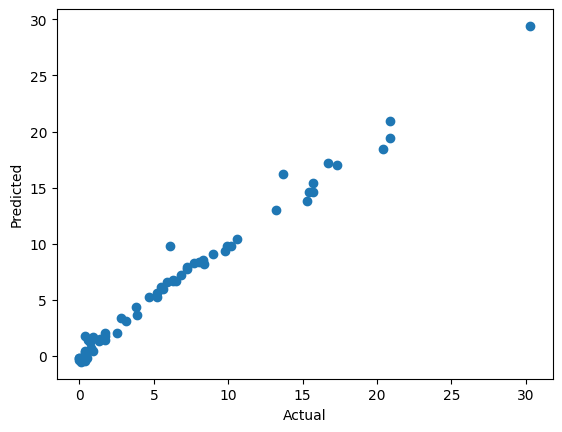

Mean Absolute Error: 0.5642305340105691
R2 Score: 0.9842993364555513


In [33]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=5)
ridge.fit(X_train,y_train)
y_pred_3 = ridge.predict(X_test)
plt.scatter(y_test,y_pred_3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
mae = mean_absolute_error(y_test,y_pred_3)
print('Mean Absolute Error:',mae)
score = r2_score(y_test,y_pred_3)
print('R2 Score:',score)

In [34]:
ridge.alphas

(0.1, 1.0, 10.0)

In [35]:
ridge.alpha_

1.0

In [36]:
ridge.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## Elastic Net Regression

Mean Absolute Error: 1.8822353634896
R2 Score: 0.8753460589519703


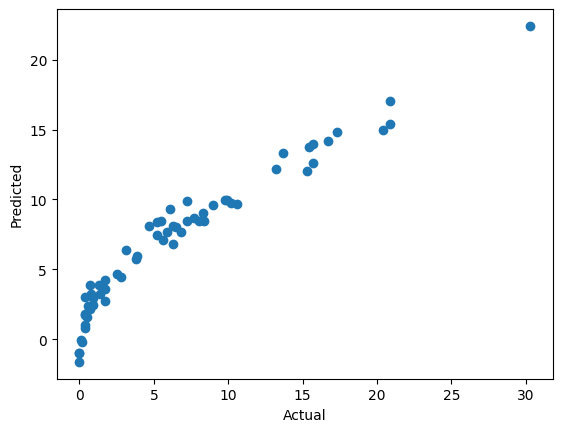

In [37]:
from sklearn.linear_model import ElasticNet
regressor = ElasticNet()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)
score = r2_score(y_test,y_pred)
print('R2 Score:',score)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Cross Validation ElasticNet

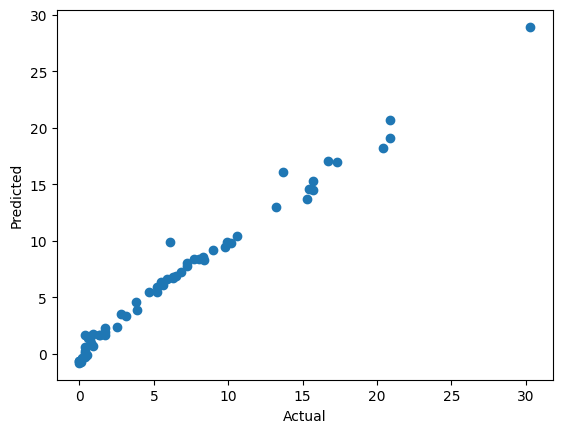

Mean Absolute Error: 0.6575946731430901
R2 Score: 0.9814217587854941


In [38]:
from sklearn.linear_model import ElasticNetCV
elastic = ElasticNetCV(cv=5)
elastic.fit(X_train,y_train)
y_pred_4 = elastic.predict(X_test)
plt.scatter(y_test,y_pred_4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
mae = mean_absolute_error(y_test,y_pred_4)
print('Mean Absolute Error:',mae)
score = r2_score(y_test,y_pred_4)
print('R2 Score:',score)

In [39]:
elastic.alpha_

0.04311146156383891

In [40]:
elastic.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [41]:
# Pickling the ml model (ridge), preprocessing model and standard scaler...
import pickle
pickle.dump(sc,open('scaler.pkl','wb'))
pickle.dump(sc,open('ridge.pkl','wb'))